<a href = "https://www.pieriantraining.com"><img src="../PT Centered Purple.png"> </a>

<em style="text-align:center">Copyrighted by Pierian Training</em>

# Image Classification

## Dataset

AutoGluon comes with a great built in data set based on the [Shopee-IET dataset](https://www.kaggle.com/c/shopee-iet-machine-learning-competition/data) from Kaggle.

Each image in this data depicts a clothing item and the corresponding label specifies its clothing category.
The AutoGluon subset of the data contains the following possible labels: `BabyPants`, `BabyShirt`, `womencasualshoes`, `womenchiffontop`.

You can automatically download the dataset:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

from autogluon.multimodal.utils.misc import shopee_dataset
download_dir = './ag_automm_tutorial_imgcls'
train_data_path, test_data_path = shopee_dataset(download_dir)
print(train_data_path)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41.9M/41.9M [00:07<00:00, 5.43MiB/s]


                                                 image  label
0    C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      0
1    C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      0
2    C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      0
3    C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      0
4    C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      0
..                                                 ...    ...
795  C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      3
796  C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      3
797  C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      3
798  C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      3
799  C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...      3

[800 rows x 2 columns]


We can see there are 800 rows and 2 columns in this training dataframe. The 2 columns are **image** and **label**, and the **image** column contains the absolute paths of the images. Each row represents a different training sample.


In [3]:
from IPython.display import Image, display

In [4]:
train_data_path

,image,label
0,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,0
1,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,0
2,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,0
3,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,0
4,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,0
...,...,...
795,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,3
796,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,3
797,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,3
798,C:\Users\Marcial\Pierian-Data-Courses\AutoGluo...,3


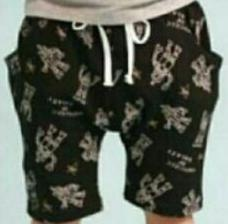

In [8]:
display(Image(train_data_path['image'][15]))

## Use AutoMM to Fit Models

Now, we fit a classifier using AutoMM as follows:

In [10]:
from autogluon.multimodal import MultiModalPredictor
model_path = "image_classifier"
predictor = MultiModalPredictor(label="label", path=model_path)
predictor.fit(
    train_data=train_data_path,  
    time_limit=120, # seconds
)  

Global seed set to 123
AutoMM starts to create your model. ✨

- Model will be saved to "C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\03-Images\image_classifier".

- Validation metric is "accuracy".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\03-Images\image_classifier
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name              | Type                            | Params
----------------------------------------------------------------------
0 | model             | TimmAutoModelForImagePrediction | 86.7 M
1 | validation_metric | Accuracy                        | 0     
2 | loss_func         | CrossEntropy

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Time limit reached. Elapsed time is 0:02:01. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 1: 'val_accuracy' reached 0.21875 (best 0.21875), saving model to 'C:\\Users\\Marcial\\Pierian-Data-Courses\\AutoGluon-Course\\03-Images\\image_classifier\\epoch=0-step=1.ckpt' as top 3
AutoMM has created your model 🎉🎉🎉

- To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\03-Images\image_classifier")
    ```

- You can open a terminal and launch Tensorboard to visualize the training log:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\03-Images\image_classifier
    ```

- If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub: https://github.com/autogluon/autogluon

## Evaluate on Test Data  

In [11]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
scores

Predicting: 0it [00:00, ?it/s]

{'accuracy': 0.1375}

## Predict on a New Image

Given an example image, let's visualize it first,

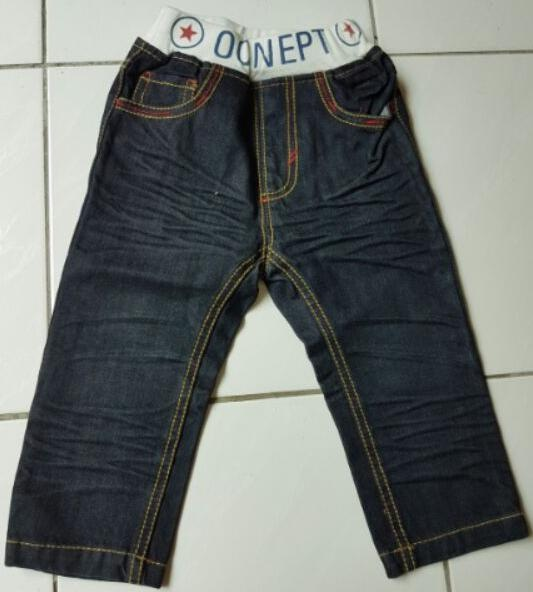

In [15]:
image_path = test_data_path.iloc[10]['image']
from IPython.display import Image, display
pil_img = Image(filename=image_path)
display(pil_img)

We can easily use the final model to `predict` the label,

In [16]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

[3]


If probabilities of all categories are needed, you can call `predict_proba`:

In [17]:
proba = predictor.predict_proba({'image': [image_path]})
print(proba)

[[0.247602   0.24582204 0.24288923 0.2636868 ]]
